***
# `Projeto:` <font color='blue'>Análise da Saúde Financeira da Empresa Netflix</font>

## `Data:` <font color='blue'>novembro, 2020</font>

## `Cientista de Dados:` <font color='blue'>Walter Trevisan</font>
***

## `03-` Explore The Data:

Nesta fase, vamos realizar as seguintes atividades:

1. **Carregar** os *datasets*, transformados e criados, que foram salvos na fase anterior (`02- Get The Data`);


2. Realizar uma **Análise Exploratória (`EDA`)** para compreender o volume de `Clientes`, as `Receitas`, os `Custos` e os `Rendimentos` da empresa, no período compreendido de **2012 até 2018** para o segmento *Domestic Streaming* (Transmissão Doméstica).

***
## Setup
>### Pacotes e Funções

In [1]:
# Carregando os pacotes:
sprintf('Loading "feather" package...')
library(feather)

sprintf('Loading "tidyverse" package...')
library(tidyverse)

sprintf('Loading "ggplot2" package...')
library(ggplot2)

sprintf('Loading "gridExtra" package...')
library(gridExtra)

# Configurando o diretório de trabalho:
setwd("D:/Portfolio/Netflix_Financial_Health/Solution")

# Definindo o diretório e o nome onde está armazenado o dataset transformado do projeto:
PROJECT_DATASET_DIR = "./Data/"
PROJECT_DATASET_FILE = "netflix_df.feather"
PROJECT_DATASET_BY_YEAR_FILE = "netflix_by_year_df.feather"

# Definindo o nome completo (path) onde está armazenado o dataset principal do projeto:
PROJECT_DATASET_PATH = paste(PROJECT_DATASET_DIR, PROJECT_DATASET_FILE, sep = "")

# Definindo o nome completo (path) onde está armazenado o dataset principal, agrupado por ano, do projeto:
PROJECT_DATASET_BY_YEAR_PATH = paste(PROJECT_DATASET_DIR, PROJECT_DATASET_BY_YEAR_FILE, sep = "")

# Definindo o diretório raiz onde ficarão armazenadas todas as "Imagens" (Gráficos) do Projeto:
PROJECT_IMG_PATH = "./Images/"
# Criando o diretório, se ele não existir:
if (dir.exists(PROJECT_IMG_PATH) == FALSE){
    dir.create(PROJECT_IMG_PATH)
}

# Definindo o diretório onde ficarão armazenadas as "Imagens" (Gráficos) desta fase do Projeto:
PROJECT_IMG_PATH = "./Images/03-Explore_The_Data/"
# Criando o diretório, se ele não existir:
if (dir.exists(PROJECT_IMG_PATH) == FALSE){
    dir.create(PROJECT_IMG_PATH)
}

# Definindo o diretório onde ficará armazenado o "dataset" do projeto como um objeto "dataframe":
PROJECT_DATA_PATH = "./Data/"
# Criando o diretório, se ele não existir:
if (dir.exists(PROJECT_DATA_PATH) == FALSE){
    dir.create(PROJECT_DATA_PATH)
}

sprintf("Diretórios do projeto:")
list.dirs(path = "..", full.names = TRUE, recursive = TRUE)

# Configura a linguagem para o ambiente de desenvolvimento:
Sys.setenv(LANGUAGE = "en")

sprintf("Setup Complete!")

[1] "Loading \"feather\" package..."

[1] "Loading \"tidyverse\" package..."

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.1     v dplyr   1.0.0
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


[1] "Loading \"ggplot2\" package..."

[1] "Loading \"gridExtra\" package..."


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



[1] "Diretórios do projeto:"

[1] ".."                                    
[2] "../BusinessProblem"                    
[3] "../Datasets"                           
[4] "../Solution"                           
[5] "../Solution/.ipynb_checkpoints"        
[6] "../Solution/Data"                      
[7] "../Solution/Images"                    
[8] "../Solution/Images/03-Explore_The_Data"
[9] "../StoryTelling"

[1] "Setup Complete!"

***
## `01-` Carregando os *datasets* em objetos do tipo `dataframe`:

### `1.1-` *Dataset* principal com todos os dados:

In [2]:
# Fazendo a leitura do dataset, salvando os dados em um objeto "dataframe":
df_data <- read_feather(path = PROJECT_DATASET_PATH)
head(df_data)

data,total_clientes,clientes_atuais,clientes_novos,receita_total,custo_da_receita,custo_marketing,lucro_de_contribuicao,margem_de_contribuicao,custo_por_cliente,receita_por_cliente,rendimento_por_cliente,segmento,trimestre,ano,custo_total,prop_clientes_novos,trimestre_cat,ano_cat
2012-03-31,23410,22022,1388,506665,360776,79381,66508,0.131,15.41119,21.64310,6.231909,Streaming,1,2012,440157,0.05929090,Q1,2012
2012-06-30,23938,22686,1252,532705,378574,70959,83172,0.156,15.81477,22.25353,6.438758,Streaming,2,2012,449533,0.05230178,Q2,2012
2012-09-30,25101,23801,1300,556027,399124,65955,90948,0.164,15.90072,22.15159,6.250866,Streaming,3,2012,465079,0.05179077,Q3,2012
2012-12-31,27146,25471,1675,589471,420390,59777,109304,0.185,15.48626,21.71484,6.228579,Streaming,4,2012,480167,0.06170338,Q4,2012
2013-03-31,29174,27913,1261,638649,440334,66965,131350,0.206,15.09337,21.89103,6.797662,Streaming,1,2013,507299,0.04322342,Q1,2013
2013-06-30,29807,28624,1183,671089,452598,67177,151314,0.225,15.18429,22.51448,7.330191,Streaming,2,2013,519775,0.03968866,Q2,2013


In [3]:
# Resumo dos dados:
str(df_data)

tibble [28 x 19] (S3: tbl_df/tbl/data.frame)
 $ data                  : Date[1:28], format: "2012-03-31" "2012-06-30" ...
 $ total_clientes        : num [1:28] 23410 23938 25101 27146 29174 ...
 $ clientes_atuais       : num [1:28] 22022 22686 23801 25471 27913 ...
 $ clientes_novos        : num [1:28] 1388 1252 1300 1675 1261 ...
 $ receita_total         : num [1:28] 506665 532705 556027 589471 638649 ...
 $ custo_da_receita      : num [1:28] 360776 378574 399124 420390 440334 ...
 $ custo_marketing       : num [1:28] 79381 70959 65955 59777 66965 ...
 $ lucro_de_contribuicao : num [1:28] 66508 83172 90948 109304 131350 ...
 $ margem_de_contribuicao: num [1:28] 0.131 0.156 0.164 0.185 0.206 0.225 0.237 0.234 0.252 0.271 ...
 $ custo_por_cliente     : num [1:28] 15.4 15.8 15.9 15.5 15.1 ...
 $ receita_por_cliente   : num [1:28] 21.6 22.3 22.2 21.7 21.9 ...
 $ rendimento_por_cliente: num [1:28] 6.23 6.44 6.25 6.23 6.8 ...
 $ segmento              : Factor w/ 1 level "Streaming": 1 1 1 1

**Análise:**

* O nosso *dataset* possui **17 variáveis** e **28 observações(linhas)**;
* Temos **01 variável** do tipo **`date`**;
* Temos **03 variáveis** do tipo **`quantitativa discreta`**;
* Temos **10 variáveis** do tipo **`quantitativa contínua`**;
* Temos **03 variáveis** do tipo **`qualitativa (categórica)`**.

### `1.2-` *Dataset* principal com todos os dados agrupados por `ano`:

In [4]:
# Fazendo a leitura do dataset, salvando os dados em um objeto "dataframe":
df_data_by_year <- read_feather(path = PROJECT_DATASET_BY_YEAR_PATH)
df_data_by_year

ano,receita_total,custo_da_receita,custo_marketing,lucro_de_contribuicao,total_clientes,clientes_atuais,clientes_novos,margem_de_contribuicao,custo_por_cliente,receita_por_cliente,rendimento_por_cliente,custo_total,prop_clientes_novos,ano_cat
2012,2184868,1558864,276072,349932,27146,25471,1675,0.1601616,57.42518,80.48582,23.06064,1834936,0.06170338,2012
2013,2751375,1863376,265232,622767,33420,31712,1708,0.2263476,55.75631,82.32720,26.57089,2128608,0.05110712,2013
2014,3431434,2201761,293453,936220,39114,37698,1416,0.2728364,56.29087,87.72905,31.43818,2495214,0.03620187,2014
2015,4180339,2487193,317646,1375500,44738,43401,1337,0.3290403,55.59464,93.44045,37.84581,2804839,0.02988511,2015
2016,5077307,2951973,412928,1712406,47905,46379,1526,0.3372666,61.62140,105.98700,44.36560,3364901,0.03185471,2016
2017,6153025,3470859,603746,2078420,52810,50870,1940,0.3377883,65.72352,116.51250,50.78898,4074605,0.03673547,2017
2018,7646647,4038394,1025351,2582902,58486,56421,2065,0.3377823,69.04890,130.74320,61.69430,5063745,0.03530759,2018


In [5]:
# Resumo dos dados:
str(df_data_by_year)

tibble [7 x 15] (S3: tbl_df/tbl/data.frame)
 $ ano                   : num [1:7] 2012 2013 2014 2015 2016 ...
 $ receita_total         : num [1:7] 2184868 2751375 3431434 4180339 5077307 ...
 $ custo_da_receita      : num [1:7] 1558864 1863376 2201761 2487193 2951973 ...
 $ custo_marketing       : num [1:7] 276072 265232 293453 317646 412928 ...
 $ lucro_de_contribuicao : num [1:7] 349932 622767 936220 1375500 1712406 ...
 $ total_clientes        : num [1:7] 27146 33420 39114 44738 47905 ...
 $ clientes_atuais       : num [1:7] 25471 31712 37698 43401 46379 ...
 $ clientes_novos        : num [1:7] 1675 1708 1416 1337 1526 ...
 $ margem_de_contribuicao: num [1:7] 0.16 0.226 0.273 0.329 0.337 ...
 $ custo_por_cliente     : num [1:7] 57.4 55.8 56.3 55.6 61.6 ...
 $ receita_por_cliente   : num [1:7] 80.5 82.3 87.7 93.4 106 ...
 $ rendimento_por_cliente: num [1:7] 23.1 26.6 31.4 37.8 44.4 ...
 $ custo_total           : num [1:7] 1834936 2128608 2495214 2804839 3364901 ...
 $ prop_clientes_n

**Análise:**

* O nosso *dataset* possui **15 variáveis** e **07 observações(linhas)**;
* Temos **01 variável** do tipo **`qualitativa (categórica)`**;
* Temos **04 variáveis** do tipo **`quantitativa discreta`**;
* Temos **10 variáveis** do tipo **`quantitativa contínua`**.

***
## `02-` Análise Exploratória (`EDA`):

In [6]:
# Resumo estatístico:
summary(df_data)

      data            total_clientes  clientes_atuais clientes_novos
 Min.   :2012-03-31   Min.   :23410   Min.   :22022   Min.   : 954  
 1st Qu.:2013-12-08   1st Qu.:32838   1st Qu.:31265   1st Qu.:1179  
 Median :2015-08-15   Median :42741   Median :41563   Median :1318  
 Mean   :2015-08-15   Mean   :41407   Mean   :40032   Mean   :1375  
 3rd Qu.:2017-04-22   3rd Qu.:49612   3rd Qu.:48103   3rd Qu.:1512  
 Max.   :2018-12-31   Max.   :58486   Max.   :56421   Max.   :2065  
                                                                    
 receita_total     custo_da_receita  custo_marketing  lucro_de_contribuicao
 Min.   : 506665   Min.   : 360776   Min.   : 59777   Min.   : 66508       
 1st Qu.: 730686   1st Qu.: 490851   1st Qu.: 69634   1st Qu.:171837       
 Median :1044937   Median : 628803   Median : 83841   Median :342004       
 Mean   :1122321   Mean   : 663301   Mean   :114087   Mean   :344934       
 3rd Qu.:1478906   3rd Qu.: 808581   3rd Qu.:125241   3rd Qu.:503188

**Análise:** podemos observar que os dados financeiros da empresa correspondem ao período de `2012 até 2018`, ou seja, de **7 anos**, sendo que os dados foram agrupados por trimestre (`Q1`, `Q2`, `Q3` e `Q4`). Também entendemos que todas as informações referem-se apenas ao segmento `Streaming` (*Domestic Streaming*).

### `2.1-` Analisando a distribuição dos dados para as variáveis `numéricas`:

Vamos plotar os **histogramas** para compreender a distribuição das variáveis numéricas:

### Clientes:

Saving 6.67 x 6.67 in image


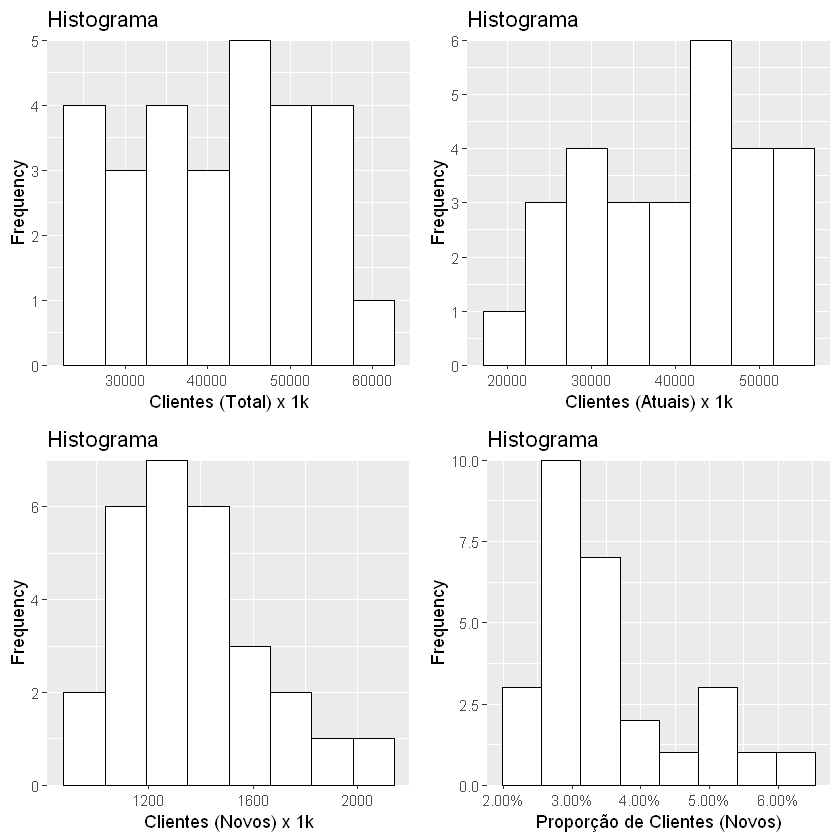

In [7]:
# Histograma do volume "total de Clientes":
p1 = ggplot(df_data, aes(x=total_clientes)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Clientes (Total) x 1k', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0))

# Histograma do volume "total de Clientes atuais":
p2 = ggplot(df_data, aes(x=clientes_atuais)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Clientes (Atuais) x 1k', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0))

# Histograma do volume "total de Clientes novos":
p3 = ggplot(df_data, aes(x=clientes_novos)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Clientes (Novos) x 1k', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0))

# Histograma da proporção de "Clientes novos":
p4 = ggplot(df_data, aes(x=prop_clientes_novos)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Proporção de Clientes (Novos)', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0)) +
        # Agora, vamos formatar os valores no eixo "x" em "%":
        scale_x_continuous(labels = scales::percent)

# Combina os 4 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, p4, nrow=2, ncol=2)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "histogramas_clientes.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

### Custos:

Saving 6.67 x 6.67 in image


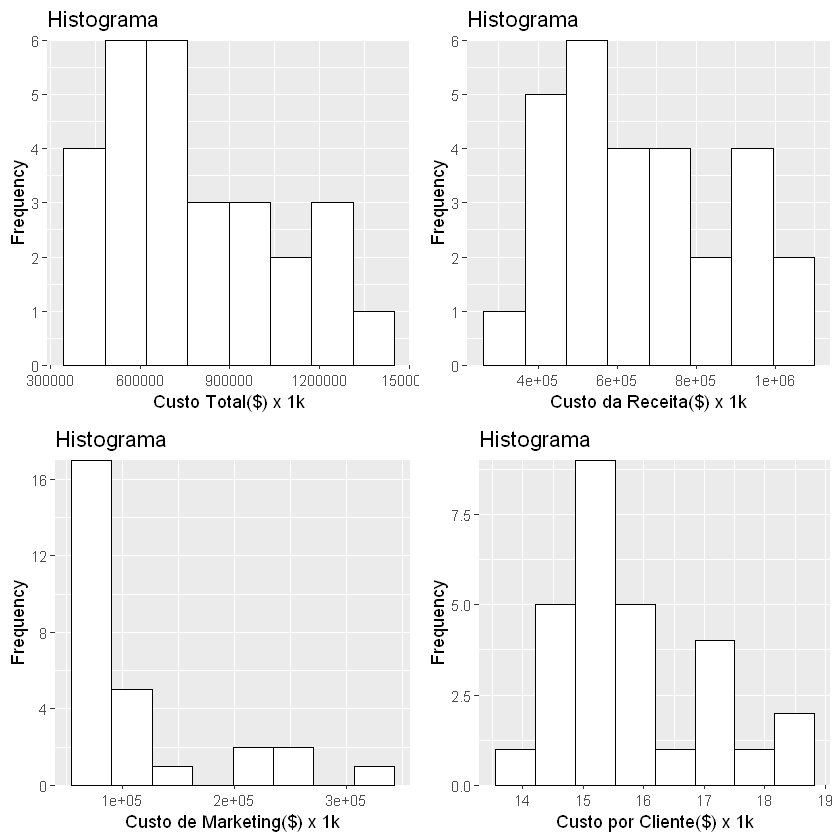

In [8]:
# Histograma do "custo total":
p1 = ggplot(df_data, aes(x=custo_total)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Custo Total($) x 1k', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0))

# Histograma do "custo da receita":
p2 = ggplot(df_data, aes(x=custo_da_receita)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Custo da Receita($) x 1k', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0))

# Histograma do "custo de marketing":
p3 = ggplot(df_data, aes(x=custo_marketing)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Custo de Marketing($) x 1k', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0))

# Histograma do "custo por Cliente":
p4 = ggplot(df_data, aes(x=custo_por_cliente)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Custo por Cliente($) x 1k', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0))

# Combina os 4 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, p4, nrow=2, ncol=2)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "histogramas_custos.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

### Receitas, Rendimentos, Lucro e Margem de Contribuição:

Saving 6.67 x 6.67 in image


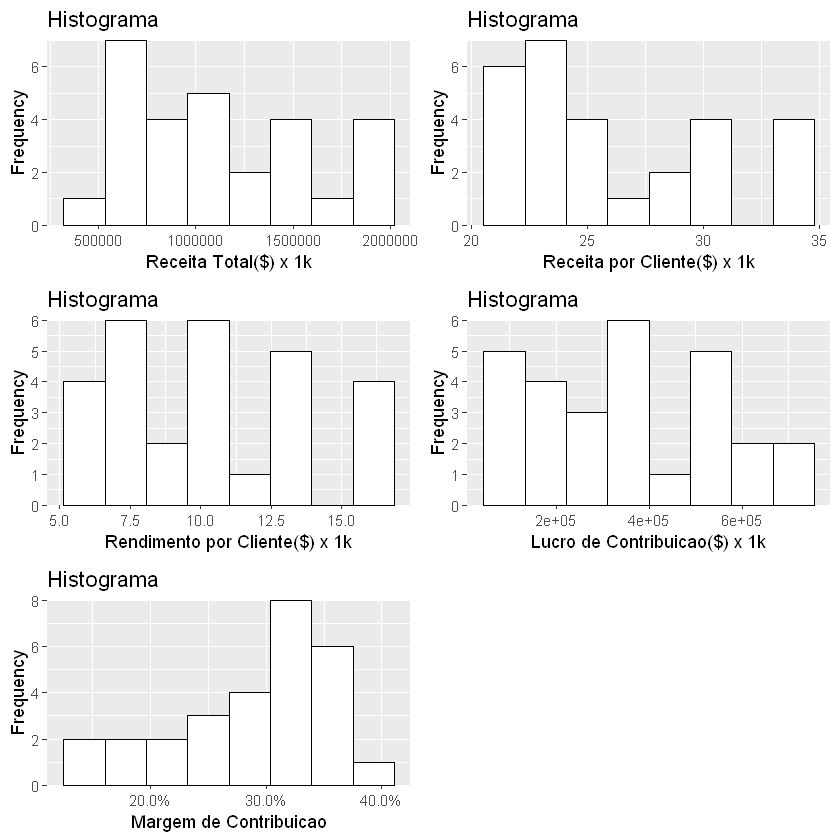

In [9]:
# Histograma da "receita total":
p1 = ggplot(df_data, aes(x=receita_total)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Receita Total($) x 1k', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0))

# Histograma da "receita por Cliente":
p2 = ggplot(df_data, aes(x=receita_por_cliente)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Receita por Cliente($) x 1k', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0))

# Histograma do "rendimento por Cliente":
p3 = ggplot(df_data, aes(x=rendimento_por_cliente)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Rendimento por Cliente($) x 1k', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0))

# Histograma do "lucro de contribuição":
p4 = ggplot(df_data, aes(x=lucro_de_contribuicao)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Lucro de Contribuicao($) x 1k', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0))

# Histograma da "margem de contribuição":
p5 = ggplot(df_data, aes(x=margem_de_contribuicao)) +
        geom_histogram(bins = 8, color = "black", fill = "white") +
        labs(x = 'Margem de Contribuicao', y = 'Frequency', title = 'Histograma') +
        # Agora, vamos remover o espaço entre o eixo "x" e os valores "x":
        scale_y_continuous(expand = c(0,0)) +
        # Agora, vamos formatar os valores no eixo "x" em "%":
        scale_x_continuous(labels = scales::percent)

# Combina os 5 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, p4, p5, nrow=3, ncol=2)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "histogramas_receitas_lucros.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

### `2.2-` Agora, vamos plotar `boxplots` para verificar se temos `outliers` nos dados:

### Clientes:

Saving 6.67 x 6.67 in image


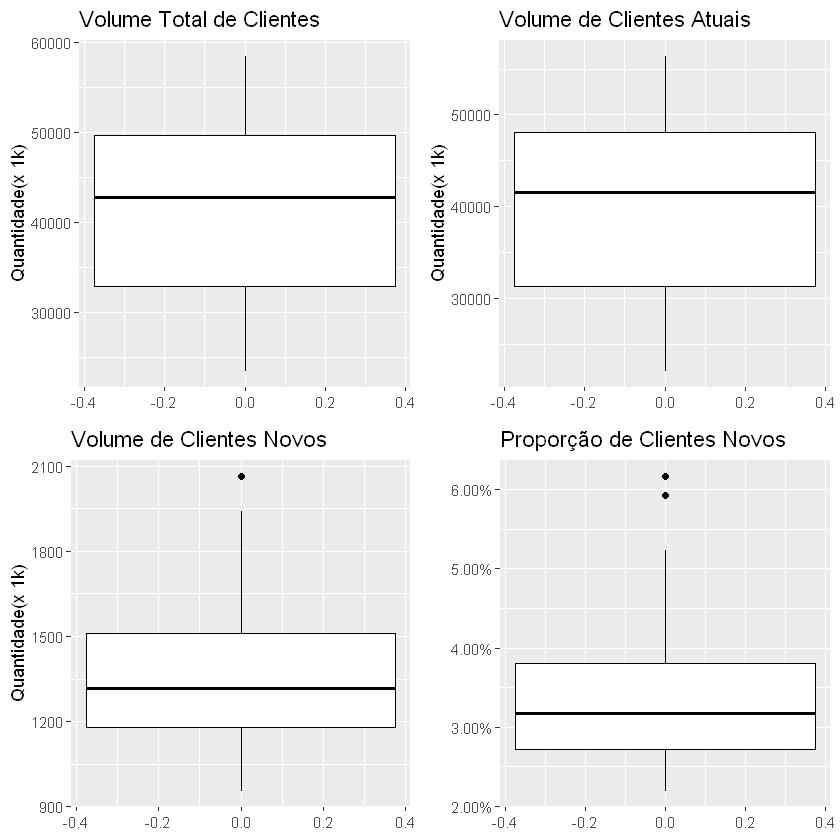

In [10]:
# Boxplot do volume "total de Clientes":
p1 = ggplot(df_data, aes(y=total_clientes)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = 'Quantidade(x 1k)', title = 'Volume Total de Clientes')

# Boxplot do volume "total de Clientes atuais":
p2 = ggplot(df_data, aes(y=clientes_atuais)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = 'Quantidade(x 1k)', title = 'Volume de Clientes Atuais')

# Boxplot do volume "total de Clientes novos":
p3 = ggplot(df_data, aes(y=clientes_novos)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = 'Quantidade(x 1k)', title = 'Volume de Clientes Novos')

# Boxplot da proporção de "Clientes novos":
p4 = ggplot(df_data, aes(y=prop_clientes_novos)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = '', title = 'Proporção de Clientes Novos') +
        # Agora, vamos formatar os valores no eixo "x" em "%":
        scale_y_continuous(labels = scales::percent)

# Combina os 4 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, p4, nrow=2, ncol=2)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "boxplots_clientes.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:** podemos observar que temos alguns ***outliers*** relacionados aos clientes novos.

### Custos:

Saving 6.67 x 6.67 in image


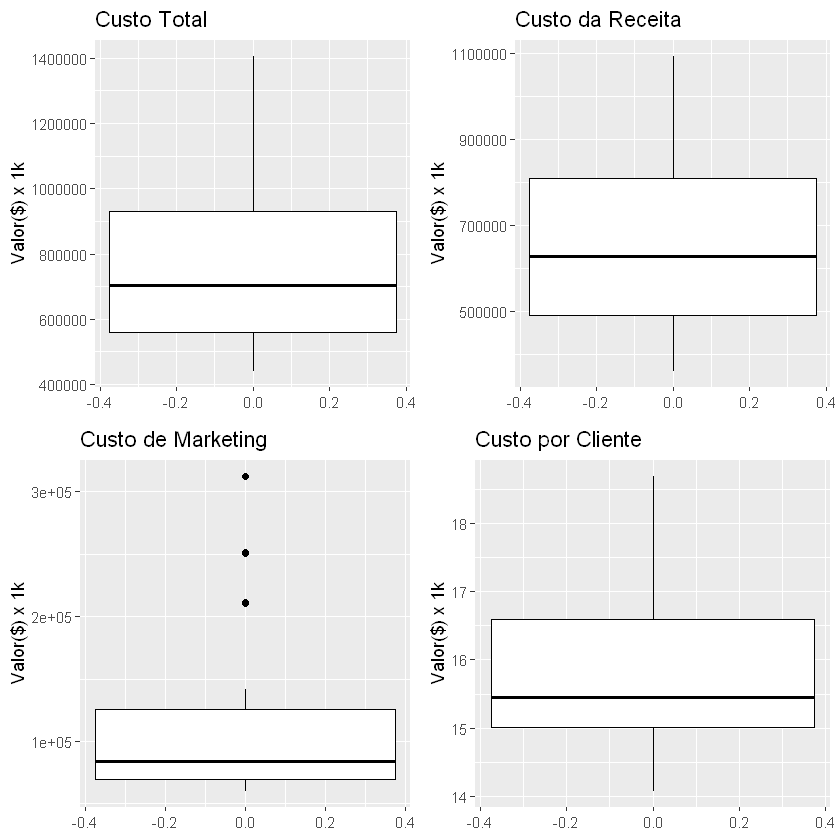

In [11]:
# Boxplot do "custo total":
p1 = ggplot(df_data, aes(y=custo_total)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = 'Valor($) x 1k', title = 'Custo Total')

# Boxplot do "custo da receita":
p2 = ggplot(df_data, aes(y=custo_da_receita)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = 'Valor($) x 1k', title = 'Custo da Receita')

# Boxplot do "custo de marketing":
p3 = ggplot(df_data, aes(y=custo_marketing)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = 'Valor($) x 1k', title = 'Custo de Marketing')

# Boxplot do "custo por Cliente":
p4 = ggplot(df_data, aes(y=custo_por_cliente)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = 'Valor($) x 1k', title = 'Custo por Cliente')

# Combina os 4 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, p4, nrow=2, ncol=2)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "boxplots_custos.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:** podemos observar que temos alguns ***outliers*** relacionados ao custo de marketing.

### Receitas, Rendimentos, Lucro e Margem de Contribuição:

Saving 6.67 x 6.67 in image


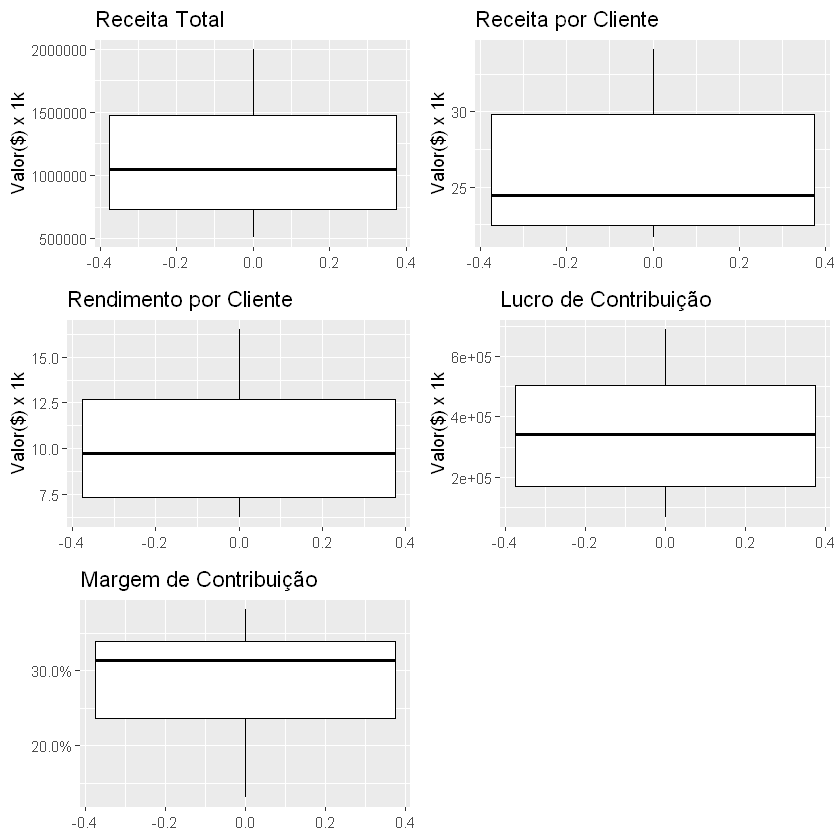

In [12]:
# Boxplot da "receita total":
p1 = ggplot(df_data, aes(y=receita_total)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = 'Valor($) x 1k', title = 'Receita Total')

# Boxplot da "receita por Cliente":
p2 = ggplot(df_data, aes(y=receita_por_cliente)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = 'Valor($) x 1k', title = 'Receita por Cliente')

# Boxplot do "rendimento por Cliente":
p3 = ggplot(df_data, aes(y=rendimento_por_cliente)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = 'Valor($) x 1k', title = 'Rendimento por Cliente')

# Boxplot do "lucro de contribuição":
p4 = ggplot(df_data, aes(y=lucro_de_contribuicao)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = 'Valor($) x 1k', title = 'Lucro de Contribuição')

# Boxplot da "margem de contribuição":
p5 = ggplot(df_data, aes(y=margem_de_contribuicao)) +
        geom_boxplot(color = "black", fill = "white") +
        labs(y = '', title = 'Margem de Contribuição') +
        # Agora, vamos formatar os valores no eixo "y" em "%":
        scale_y_continuous(labels = scales::percent)

# Combina os 5 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, p4, p5, nrow=3, ncol=2)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "boxplots_receitas_lucros.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

### `2.3-` Agora, vamos analisar o volume de `clientes` por `ano`, e também por `trimestre`:

### Analisando o volume de `clientes` por `ano`:

Saving 6.67 x 6.67 in image


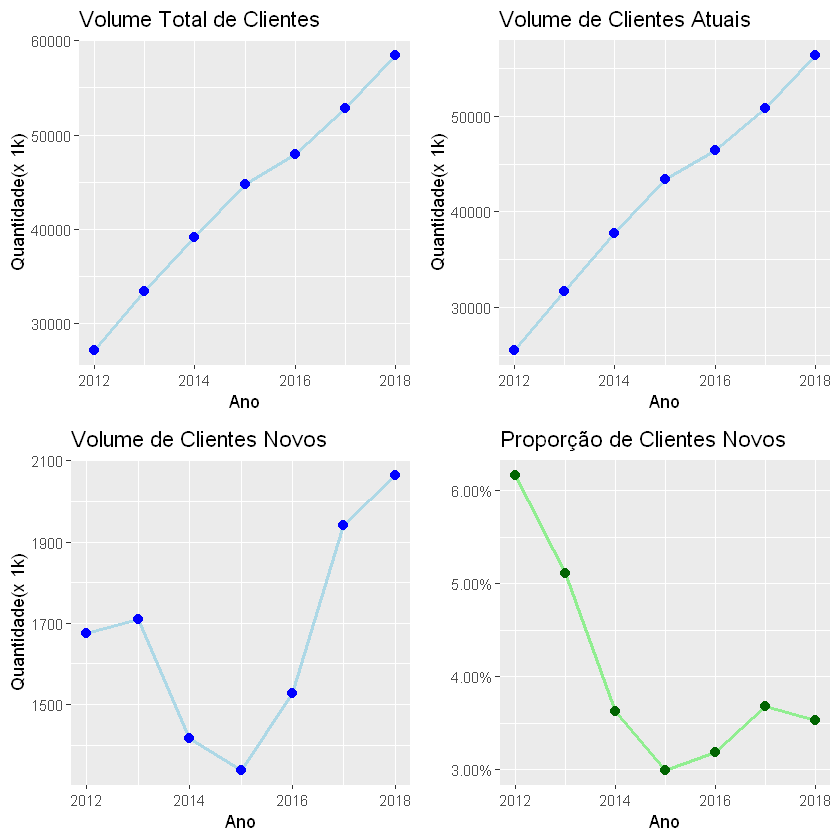

In [13]:
# Criando um gráfico de linhas para o volume "total de clientes" por ano:
p1 <- ggplot(df_data_by_year, aes(x = ano, y = total_clientes)) +
            geom_line(size = 1, linetype = 1, colour = 'lightblue') + geom_point(size = 2.5, color = 'blue') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "Quantidade(x 1k)", title = "Volume Total de Clientes")

# Criando um gráfico de linhas para o volume de "clientes atuais" por ano:
p2 <- ggplot(df_data_by_year, aes(x = ano, y = clientes_atuais)) +
            geom_line(size = 1, linetype = 1, colour = 'lightblue') + geom_point(size = 2.5, color = 'blue') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "Quantidade(x 1k)", title = "Volume de Clientes Atuais")

# Criando um gráfico de linhas para o volume de "clientes novos" por ano:
p3 <- ggplot(df_data_by_year, aes(x = ano, y = clientes_novos)) +
            geom_line(size = 1, linetype = 1, colour = 'lightblue') + geom_point(size = 2.5, color = 'blue') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "Quantidade(x 1k)", title = "Volume de Clientes Novos")

# Criando um gráfico de linhas para a proporção de "clientes novos" por ano:
p4 <- ggplot(df_data_by_year, aes(x = ano, y = prop_clientes_novos)) +
            geom_line(size = 1, linetype = 1, colour = 'lightgreen') + geom_point(size = 2.5, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "", title = "Proporção de Clientes Novos") +

            # Agora, vamos formatar os valores no eixo "y" em "%":
            scale_y_continuous(labels = scales::percent)

# Combina os 4 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, p4, nrow=2, ncol=2)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "plots_clientes_por_ano.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* Podemos observar que a sua base total de clientes cresceu a cada ano no período analisado, sendo que a base de clientes atuais, que pagam suas assinaturas, aumentou `~127%` em sete anos (**2012-2018**), ou seja, de **~25 milhões de clientes em 2012 para ~56 milhões de clientes em 2018**;


* A base de clientes novos são os clientes que não pagam suas assinaturas, pois estão no período de avaliação gratuita do plano. Então, podemos observar que a base de clientes teve um aumento acentuado nos anos de 2017 e 2018, provavelmente devido alguma campanha de marketing para captar mais clientes. Entretanto, a proporção destes clientes em relação a base total de clientes, **caiu de ~6% em 2012 para ~3.5% em 2018**. Isto ocorreu, provavelmente, devido ao crescimento progressivo da sua base de clientes que pagam suas assinaturas, ou seja, entendemos que a maioria dos clientes novos continuam com o plano após o término do período de "avaliação gratuita".

### Analisando o volume de `clientes` por `trimestre`:

Saving 6.67 x 6.67 in image


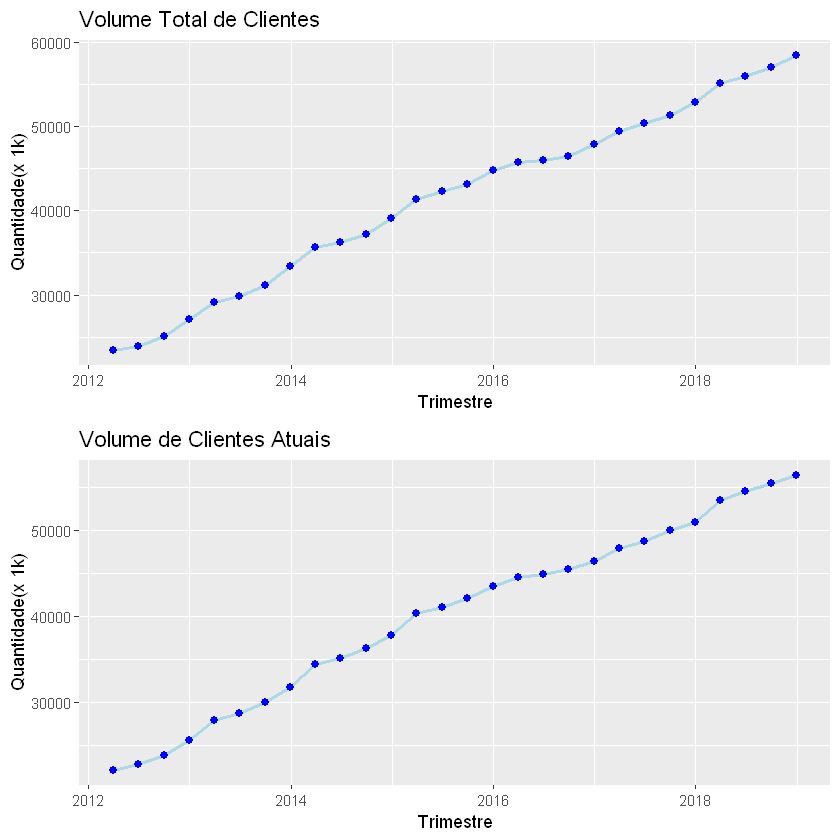

In [14]:
# Criando um gráfico de linhas para o volume "total de clientes" por trimestre:
p1 <- ggplot(df_data, aes(x = data, y = total_clientes)) +
            geom_line(size = 1, linetype = 1, colour = 'lightblue') + geom_point(size = 2, color = 'blue') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "Quantidade(x 1k)", title = "Volume Total de Clientes")

# Criando um gráfico de linhas para o volume de "clientes atuais" por trimestre:
p2 <- ggplot(df_data, aes(x = data, y = clientes_atuais)) +
            geom_line(size = 1, linetype = 1, colour = 'lightblue') + geom_point(size = 2, color = 'blue') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "Quantidade(x 1k)", title = "Volume de Clientes Atuais")

# Combina os 2 gráficos na mesma área:
g <- arrangeGrob(p1, p2, nrow=2, ncol=1)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "plots_clientes_por_trimestre.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* Os gráficos acima mostram que tanto a base total de clientes, quanto a base de clientes atuais (que pagam suas assinaturas) cresceram também em cada trimestre, ou seja, mantiveram um crescimento progressivo em todo o período (2012-2018).

Saving 6.67 x 6.67 in image


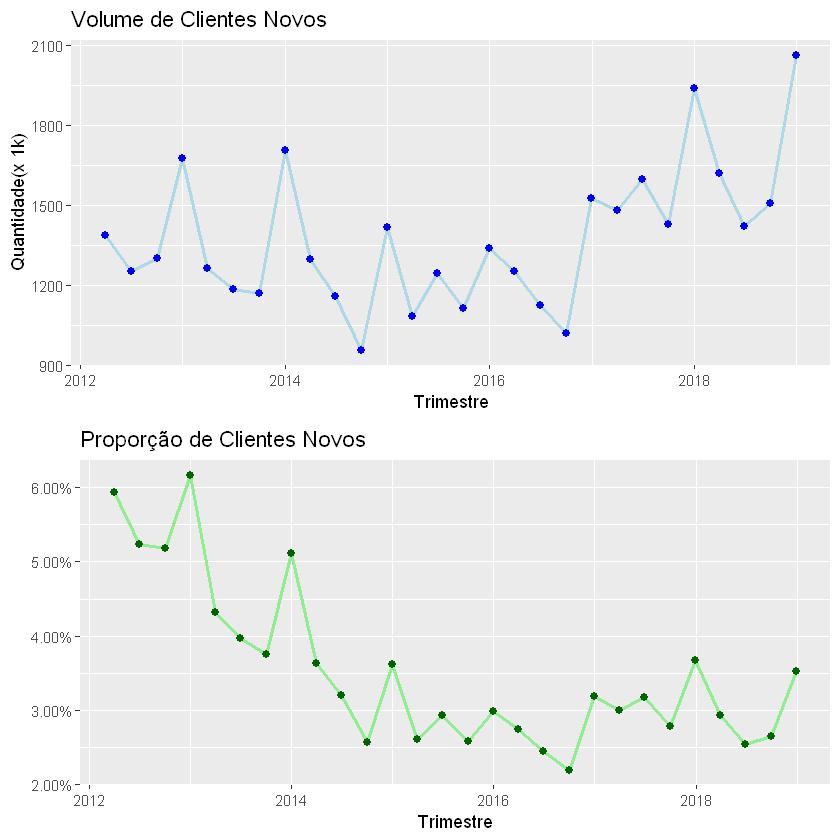

In [15]:
# Criando um gráfico de linhas para o volume de "clientes novos" por trimestre:
p1 <- ggplot(df_data, aes(x = data, y = clientes_novos)) +
            geom_line(size = 1, linetype = 1, colour = 'lightblue') + geom_point(size = 2, color = 'blue') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "Quantidade(x 1k)", title = "Volume de Clientes Novos")

# Criando um gráfico de linhas para a proporção de "clientes novos" por trimestre:
p2 <- ggplot(df_data, aes(x = data, y = prop_clientes_novos)) +
            geom_line(size = 1, linetype = 1, colour = 'lightgreen') + geom_point(size = 2, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "", title = "Proporção de Clientes Novos") +

            # Agora, vamos formatar os valores no eixo "y" em "%":
            scale_y_continuous(labels = scales::percent)

# Combina os 2 gráficos na mesma área:
g <- arrangeGrob(p1, p2, nrow=2, ncol=1)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "plots_clientes_novos_por_trimestre.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* Podemos observar que o **volume total de clientes novos** sempre *aumentou* no último trimestre (**Q4**) em todos os anos;


* O mesmo ocorreu com a **proporção de clientes novos**, exceto no ano de **2015** em que a *proporção se manteve estável* entre os trimestres, ou seja, aproximadamente entre **2.5% e 3.0%**.

### `2.4-` Agora, vamos analisar os `custos` por `ano`, e também por `trimestre`:

### Analisando os `custos` por `ano`:

Saving 6.67 x 6.67 in image


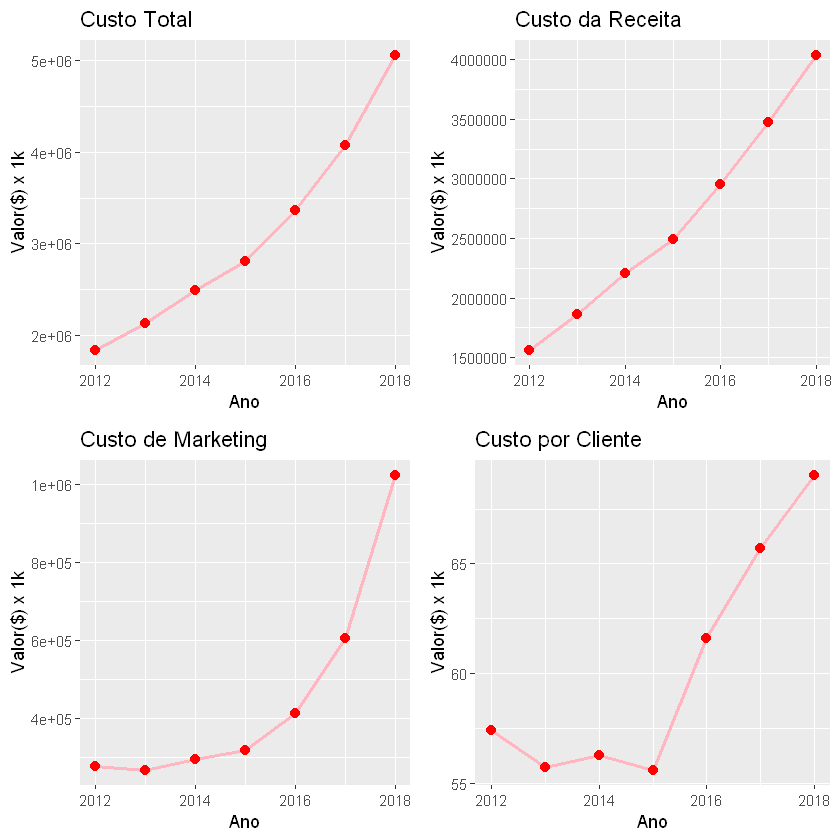

In [16]:
# Criando um gráfico de linhas para o "custo total" por ano:
p1 <- ggplot(df_data_by_year, aes(x = ano, y = custo_total)) +
            geom_line(size = 1, linetype = 1, colour = 'lightpink') + geom_point(size = 2.5, color = 'red') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "Valor($) x 1k", title = "Custo Total")

# Criando um gráfico de linhas para o "custo da receita" por ano:
p2 <- ggplot(df_data_by_year, aes(x = ano, y = custo_da_receita)) +
            geom_line(size = 1, linetype = 1, colour = 'lightpink') + geom_point(size = 2.5, color = 'red') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "Valor($) x 1k", title = "Custo da Receita")

# Criando um gráfico de linhas para o "custo de marketing" por ano:
p3 <- ggplot(df_data_by_year, aes(x = ano, y = custo_marketing)) +
            geom_line(size = 1, linetype = 1, colour = 'lightpink') + geom_point(size = 2.5, color = 'red') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "Valor($) x 1k", title = "Custo de Marketing")

# Criando um gráfico de linhas para o "custo por cliente" por ano:
p4 <- ggplot(df_data_by_year, aes(x = ano, y = custo_por_cliente)) +
            geom_line(size = 1, linetype = 1, colour = 'lightpink') + geom_point(size = 2.5, color = 'red') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "Valor($) x 1k", title = "Custo por Cliente")

# Combina os 4 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, p4, nrow=2, ncol=2)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "plots_custos_por_ano.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* O **custo total** e o **custo da receita** aumentaram com o passar dos anos, muito provavelmente devido ao aumento do volume de clientes que cresceu no mesmo período. Entretanto, notamos um aumento mais acentuado a partir de **2016**;


* Observamos que o **custo de marketing** se manteve constante até o ano de **2015**. Entretanto, notamos um aumento mais acentuado a partir de **2016**. Isto também aconteceu com o **custo por cliente**.

### Analisando os `custos` por `trimestre`:

Saving 6.67 x 6.67 in image


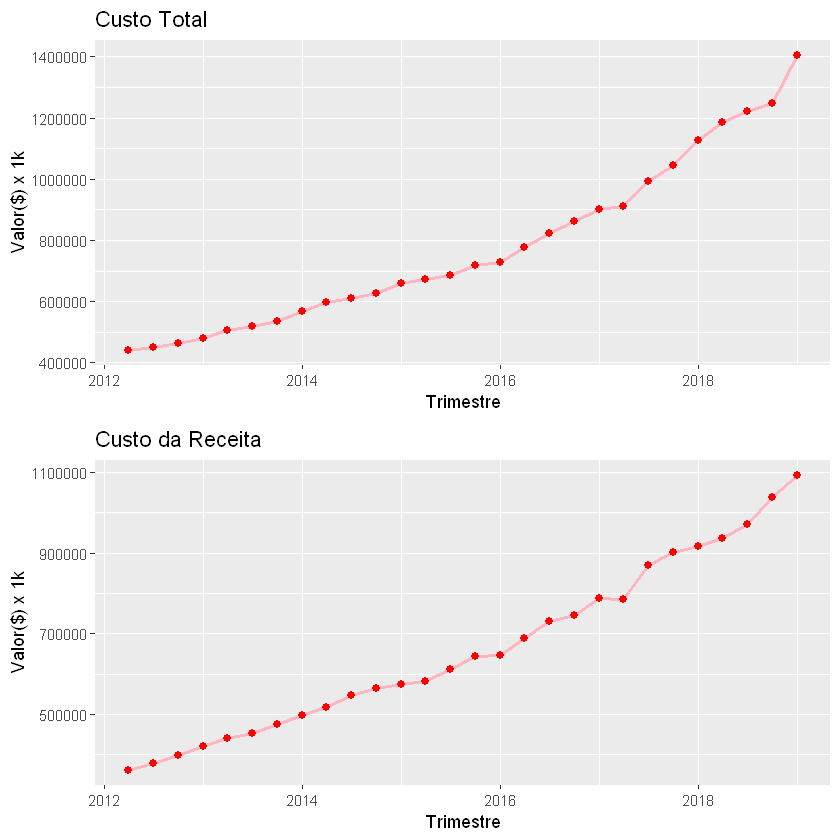

In [17]:
# Criando um gráfico de linhas para o "custo total" por trimestre:
p1 <- ggplot(df_data, aes(x = data, y = custo_total)) +
            geom_line(size = 1, linetype = 1, colour = 'lightpink') + geom_point(size = 2, color = 'red') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "Valor($) x 1k", title = "Custo Total")

# Criando um gráfico de linhas para o "custo da receita" por trimestre:
p2 <- ggplot(df_data, aes(x = data, y = custo_da_receita)) +
            geom_line(size = 1, linetype = 1, colour = 'lightpink') + geom_point(size = 2, color = 'red') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "Valor($) x 1k", title = "Custo da Receita")

# Combina os 2 gráficos na mesma área:
g <- arrangeGrob(p1, p2, nrow=2, ncol=1)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "plots_custos_total_e_da_receita_por_trimestre.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH,
       dpi = 300)

**Análise:**

* O **custo total** e o **custo da receita** aumentaram a cada trimestre, muito provavelmente devido ao aumento do volume de clientes que cresceu no mesmo período. Entretanto, notamos um aumento mais acentuado a partir de **Q1/2016** e **Q2/2017**.

Saving 6.67 x 6.67 in image


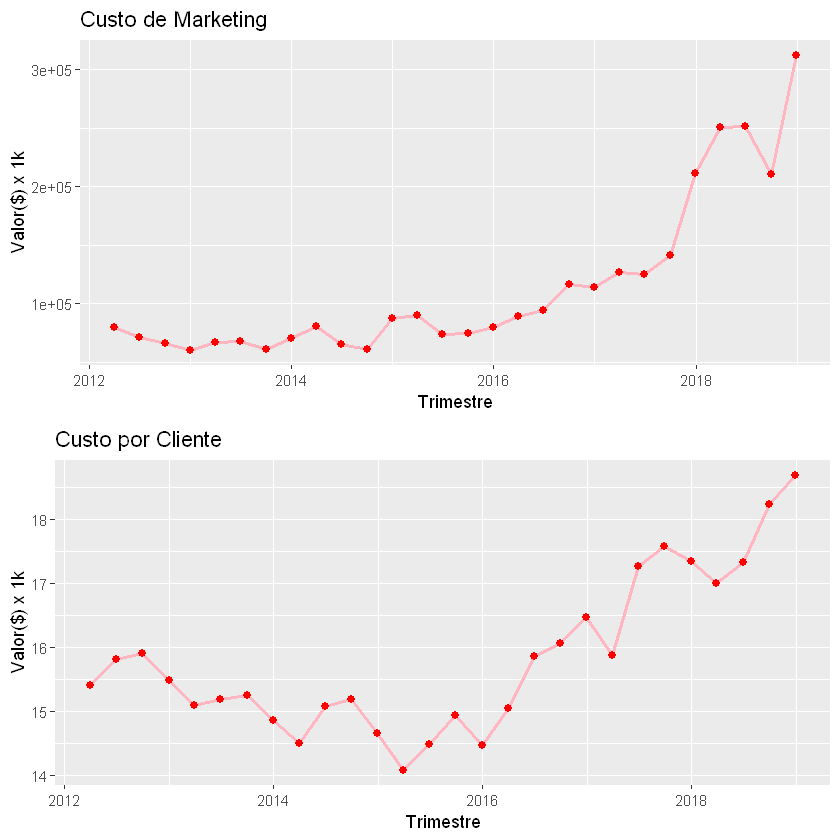

In [18]:
# Criando um gráfico de linhas para o "custo de marketing" por trimestre:
p1 <- ggplot(df_data, aes(x = data, y = custo_marketing)) +
            geom_line(size = 1, linetype = 1, colour = 'lightpink') + geom_point(size = 2, color = 'red') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "Valor($) x 1k", title = "Custo de Marketing")

# Criando um gráfico de linhas para o "custo por cliente" por trimestre:
p2 <- ggplot(df_data, aes(x = data, y = custo_por_cliente)) +
            geom_line(size = 1, linetype = 1, colour = 'lightpink') + geom_point(size = 2, color = 'red') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "Valor($) x 1k", title = "Custo por Cliente")

# Combina os 2 gráficos na mesma área:
g <- arrangeGrob(p1, p2, nrow=2, ncol=1)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "plots_custos_marketing_e_por_cliente_por_trimestre.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH,
       dpi = 300)

**Análise:**


* A partir de **Q1/2017** os **custos de marketing** tiveram um *aumento acentuado* até o final do período (**Q4/2018**). Isto coincide com o aumento do volume de clientes novos no mesmo período, ou seja, provavelmente a empresa aumentou suas campanhas de marketing para captar novos clientes no mercado;


* Apesar de observarmos um aumento progressivo no volume de clientes (total e atuais), o custo por cliente se manteve praticamente constante de **Q1/2012 a Q1/2017**, com um aumento acentuado dos custos a partir de **Q2/2017**. Lembrando, que no cálculo deste custo por cliente não é considerado os custos com marketing.

### `2.5-` Agora, vamos analisar as `receitas`, os `rendimentos por cliente` e o `lucro/margem de contribuição`, por `ano` e também por `trimestre`:

### Analisando as `receitas` os `rendimentos` e `lucros/margens` por `ano`:

Saving 6.67 x 6.67 in image


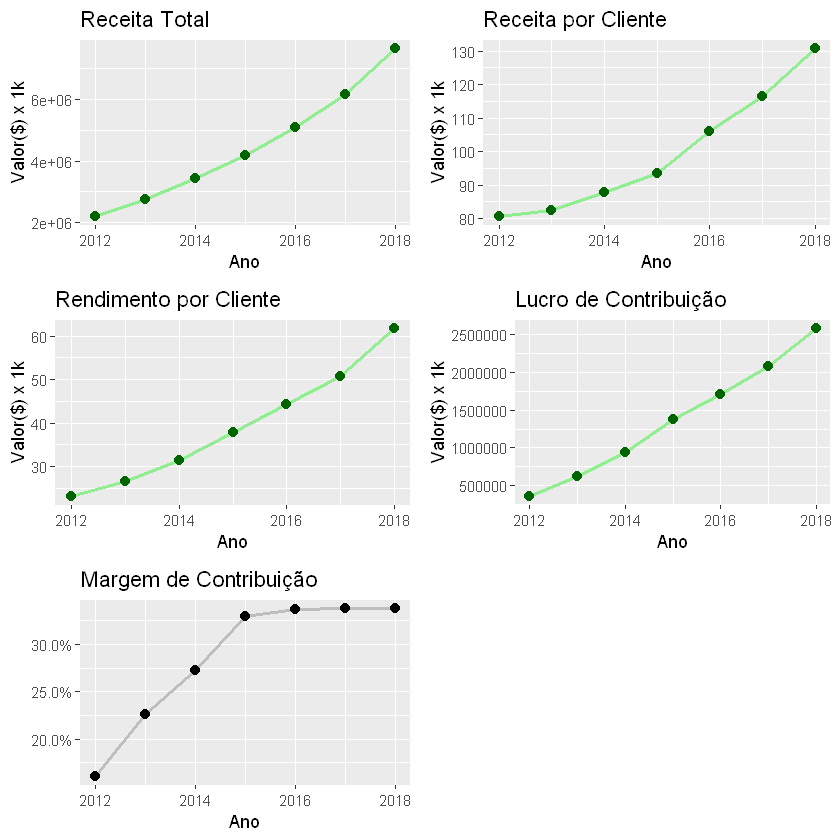

In [19]:
# Criando um gráfico de linhas para a "receita total" por ano:
p1 <- ggplot(df_data_by_year, aes(x = ano, y = receita_total)) +
            geom_line(size = 1, linetype = 1, colour = 'lightgreen') + geom_point(size = 2.5, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "Valor($) x 1k", title = "Receita Total")

# Criando um gráfico de linhas para a "receita por cliente" por ano:
p2 <- ggplot(df_data_by_year, aes(x = ano, y = receita_por_cliente)) +
            geom_line(size = 1, linetype = 1, colour = 'lightgreen') + geom_point(size = 2.5, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "Valor($) x 1k", title = "Receita por Cliente")

# Criando um gráfico de linhas para o "rendimento por cliente" por ano:
p3 <- ggplot(df_data_by_year, aes(x = ano, y = rendimento_por_cliente)) +
            geom_line(size = 1, linetype = 1, colour = 'lightgreen') + geom_point(size = 2.5, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "Valor($) x 1k", title = "Rendimento por Cliente")

# Criando um gráfico de linhas para o "lucro de contribuição" por ano:
p4 <- ggplot(df_data_by_year, aes(x = ano, y = lucro_de_contribuicao)) +
            geom_line(size = 1, linetype = 1, colour = 'lightgreen') + geom_point(size = 2.5, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "Valor($) x 1k", title = "Lucro de Contribuição")

# Criando um gráfico de linhas para a "margem de contribuição" por ano:
p5 <- ggplot(df_data_by_year, aes(x = ano, y = margem_de_contribuicao)) +
            geom_line(size = 1, linetype = 1, colour = 'gray') + geom_point(size = 2.5, color = 'black') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Ano", y = "", title = "Margem de Contribuição") +

            # Agora, vamos formatar os valores no eixo "y" em "%":
            scale_y_continuous(labels = scales::percent)

# Combina os 5 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, p4, p5, nrow=3, ncol=2)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "plots_receitas_e_ganhos_por_cliente_por_ano.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH,
       dpi = 300)

### Analisando o `aumento(%)` entre os anos de `2012` e `2018`:

In [20]:
# Definindo os nomes das variáveis:
colunas = c("ano", "receita_total", "receita_por_cliente", "rendimento_por_cliente", "lucro_de_contribuicao",
            "margem_de_contribuicao")

# Criando um novo dataframe:
df_aumento <- df_data_by_year %>%
                    select(all_of(colunas)) %>%
                    filter(ano == 2012 | ano == 2018)

# Definindo a variável "ano" como nome (índice) das linhas:
df_aumento <- column_to_rownames(as.data.frame(df_aumento), var = "ano")

# Transposta: transformando as linhas em colunas e as colunas em linhas:
df_aumento <- as.data.frame(t(df_aumento))

# Renomeando as colunas:
colnames(df_aumento) = c("ano_2012", "ano_2018")

# Calculando o "aumento" das variáveis:
df_aumento <- mutate(df_aumento,
                     aumento_porcentagem = round(((ano_2018 - ano_2012)/ano_2012) * 100, digits = 2)
                    ) %>% as.data.frame()

# Redefinindo os nomes das linhas:
rownames(df_aumento) = c("receita_total", "receita_por_cliente", "rendimento_por_cliente", "lucro_de_contribuicao",
            "margem_de_contribuicao")

# Visualizando os resultados:
df_aumento

,ano_2012,ano_2018,aumento_porcentagem
receita_total,2.184868e+06,7.646647e+06,249.98
receita_por_cliente,8.048582e+01,1.307432e+02,62.44
rendimento_por_cliente,2.306064e+01,6.169430e+01,167.53
lucro_de_contribuicao,3.499320e+05,2.582902e+06,638.12
margem_de_contribuicao,1.601616e-01,3.377823e-01,110.90


**Análise:**

* Podemos observar nos primeiros 4 gráficos que as `receitas`, `rendimentos` e `lucros` aumentaram com o passar dos anos, muito provavelmente devido ao aumento do volume de clientes que cresceu no mesmo período. Entretanto, a `margem de contribuição` aumentou de forma acentuada nos primeiros 3 anos (entre **2012 e 2015**) e depois se manteve estável e constante até o final do período (entre **2016 e 2018**);


* Os números impressionam no período de **7 anos**:
>* **`Receita Total`:** *aumento* de **~250%**, ou seja, de **~2.2 bilhões** em **2012** para **~7.6 bilhões** em **2018**;
>* **`Receita por Cliente`:** *aumento* de **~62%**, ou seja, de **~80 mil** em **2012** para **~131 mil** em **2018**;
>* **`Rendimento por Cliente`:** *aumento* de **~167%**, ou seja, de **~23 mil** em **2012** para **~62 mil** em **2018**;
>* **`Lucro de Contribuição`:** *aumento* de **~638%**, ou seja, de **~350 milhões** em **2012** para **~2.6 bilhões** em **2018**;
>* **`Margem de Contribuição`:** *aumento* de **~111%**, ou seja, de **~16%** em **2012** para **~34%** em **2018**.

### Analisando as `receitas` os `rendimentos` e `lucros/margens` por `trimestre`:

Saving 6.67 x 6.67 in image


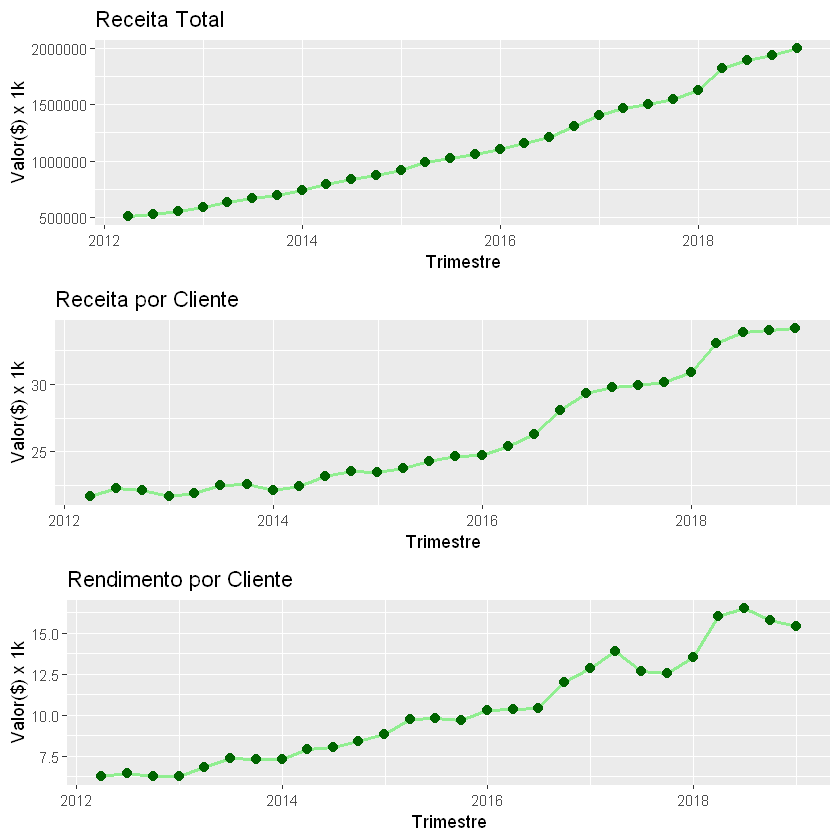

In [21]:
# Criando um gráfico de linhas para a "receita total" por trimestre:
p1 <- ggplot(df_data, aes(x = data, y = receita_total)) +
            geom_line(size = 1, linetype = 1, colour = 'lightgreen') + geom_point(size = 2.5, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "Valor($) x 1k", title = "Receita Total")

# Criando um gráfico de linhas para a "receita por cliente" por trimestre:
p2 <- ggplot(df_data, aes(x = data, y = receita_por_cliente)) +
            geom_line(size = 1, linetype = 1, colour = 'lightgreen') + geom_point(size = 2.5, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "Valor($) x 1k", title = "Receita por Cliente")

# Criando um gráfico de linhas para o "rendimento por cliente" por trimestre:
p3 <- ggplot(df_data, aes(x = data, y = rendimento_por_cliente)) +
            geom_line(size = 1, linetype = 1, colour = 'lightgreen') + geom_point(size = 2.5, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "Valor($) x 1k", title = "Rendimento por Cliente")

# Combina os 3 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, nrow=3, ncol=1)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "plots_receitas_e_rendimentos_por_trimestre.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH,
       dpi = 300)

**Análise:**

* A **receita total** *aumentou* a cada trimestre (em todos os anos), muito provavelmente devido ao aumento do volume de clientes que cresceu no mesmo período;


* A **receita por cliente** *aumentou lentamente* a cada trimestre até **Q2/2016**. A partir de **Q3/2016** até o final do período (**Q4/2018**) o *aumento foi mais acentuado*;


* O **rendimento por cliente** também *aumentou progressivamente* até **Q1/2017**. Em seguida, os rendimentos *caíram um pouco* em **Q2/2017** e **Q3/2017**, crescendo novamente a partir de **Q4/2017** até o final do período.

Saving 6.67 x 6.67 in image


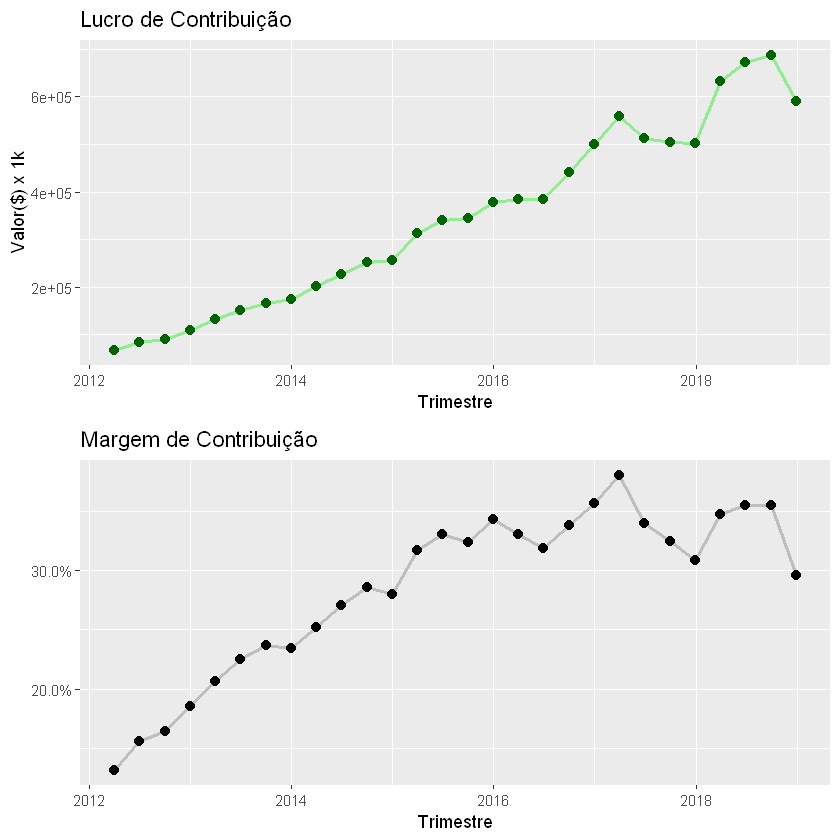

In [22]:
# Criando um gráfico de linhas para o "lucro de contribuição" por trimestre:
p1 <- ggplot(df_data, aes(x = data, y = lucro_de_contribuicao)) +
            geom_line(size = 1, linetype = 1, colour = 'lightgreen') + geom_point(size = 2.5, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "Valor($) x 1k", title = "Lucro de Contribuição")

# Criando um gráfico de linhas para a "margem de contribuição" por trimestre:
p2 <- ggplot(df_data, aes(x = data, y = margem_de_contribuicao)) +
            geom_line(size = 1, linetype = 1, colour = 'gray') + geom_point(size = 2.5, color = 'black') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Trimestre", y = "", title = "Margem de Contribuição") +

            # Agora, vamos formatar os valores no eixo "y" em "%":
            scale_y_continuous(labels = scales::percent)

# Combina os 2 gráficos na mesma área:
g <- arrangeGrob(p1, p2, nrow=2, ncol=1)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "plots_lucro_e_margem_por_trimestre.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH,
       dpi = 300)

**Análise:**

* Os **lucros e margens de contribuição** também cresceram progressivamente em todo o período (**2012** a **2018**);


* Em **Q1/2017** a **margem de contribuição** atingiu o seu melhor resultado em todo o período analisado, ou seja, **~37%**.

***
# <font color='blue'>FIM</font>